In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

In [4]:
#reading the file
df = pd.read_csv("/content/mail_data.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
#seeing first 5 rows
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [74]:
df["Message"][4]

'nah i dont think he goes to usf he lives around here though'

In [7]:
df.head(2)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [8]:
#seeing no. of values of each category
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
#chacking for null values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [12]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [17]:
df[df.duplicated()]

,Category,Message
103,ham,As per your request 'Melle Melle (Oru Minnamin...
154,ham,As per your request 'Melle Melle (Oru Minnamin...
207,ham,"As I entered my cabin my PA said, '' Happy B'd..."
223,ham,"Sorry, I'll call later"
326,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [18]:
df.drop_duplicates()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [19]:
df['Category'] = df['Category'].map({'ham' : 0 , 'spam' : 1})

In [21]:
df.head(10)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [23]:
!pip install nltk

In [25]:
import nltk


In [26]:
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
import re
def remove_html_tags(text):
      pattern = re.compile('<,*?>')
      return pattern.sub(r'',text)

df['Message'] = df['Message'].apply(remove_html_tags)

In [31]:
df['Message'] = df['Message'].str.lower()

In [34]:
df.head()

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [36]:
import string

In [37]:
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

# Apply the function to the "Message" column
df["Message"] = df["Message"].apply(remove_punctuation)

In [38]:
df.head(2)

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni


In [42]:
df.head()

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


<Axes: xlabel='Category', ylabel='count'>

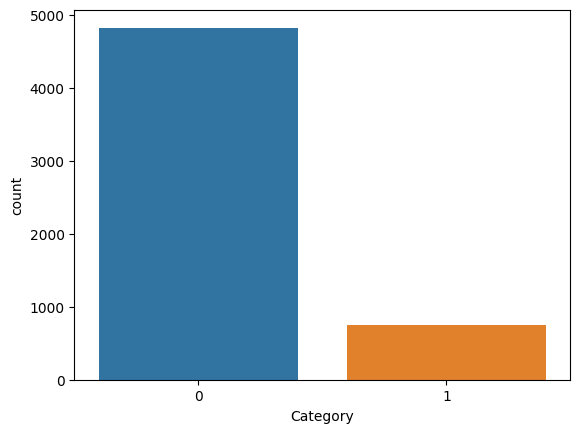

In [53]:
sns.countplot( x = 'Category' , data = df)

In [55]:
count = df['Category'].value_counts()
count

0    4825
1     747
Name: Category, dtype: int64

([<matplotlib.patches.Wedge at 0x789dde558ac0>,
 [Text(-0.8913988556099076, -0.6445215901871304, '0'),
  Text(0.8913988857821394, 0.644521548457738, '1')])

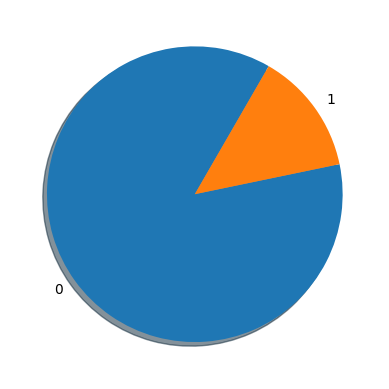

In [61]:
plt.pie(count , labels = count.index , startangle = 60 , shadow = True)


In [48]:
df['Message'][88]

'im really not up to it still tonight babe'

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [51]:
tf = TfidfVectorizer()

In [62]:
x = tf.fit_transform(df['Message']).toarray()

In [63]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
y = df['Category']

In [68]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
from sklearn.linear_model import LogisticRegression


In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [70]:
model = LogisticRegression()

In [71]:
model.fit(x_train,y_train)

LogisticRegression()

In [72]:
model.score(x_test,y_test)

0.9587443946188341

In [73]:
df.head()

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


In [80]:
input_text = ["my name is satyam"]

# Transform the input text using the loaded TF-IDF vectorizer
input_matrix = tf.transform(input_text)

# Make predictions using the loaded model
predictions = model.predict(input_matrix)
if(predictions == 0):
  print("ham")
else:
  print("spam")

ham


In [81]:
predictions

array([0])